<a href="https://colab.research.google.com/github/Pravallika1234uppala/ML/blob/main/ML%20Models/Supervised%20Learning/Regression%20Models/LinearRegression/Simple%20Linear%20Regression/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#reading dataset:
df = pd.read_csv('SOCR-HeightWeight.csv')

In [4]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [5]:
df = df.drop(labels='Index', axis=1)

In [6]:
df.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [7]:
#Missing values:
df.isnull()

,Height(Inches),Weight(Pounds)
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
24995,False,False
24996,False,False
24997,False,False
24998,False,False


<Axes: >

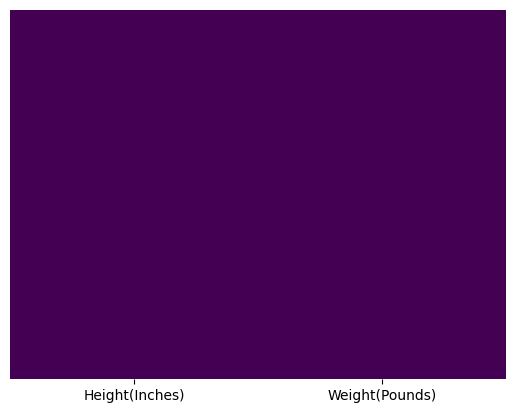

In [8]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [9]:
#(finding correlation b/w them:)
corr_matrix = df.corr()

In [10]:
corr_matrix

,Height(Inches),Weight(Pounds)
Height(Inches),1.000000,0.502859
Weight(Pounds),0.502859,1.000000


<Axes: >

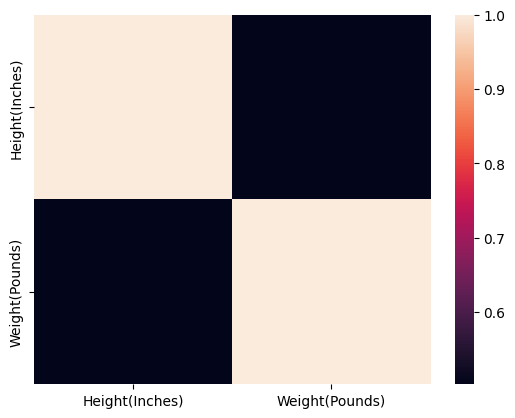

In [11]:
sns.heatmap(corr_matrix)

Text(0, 0.5, 'Height in Inches')

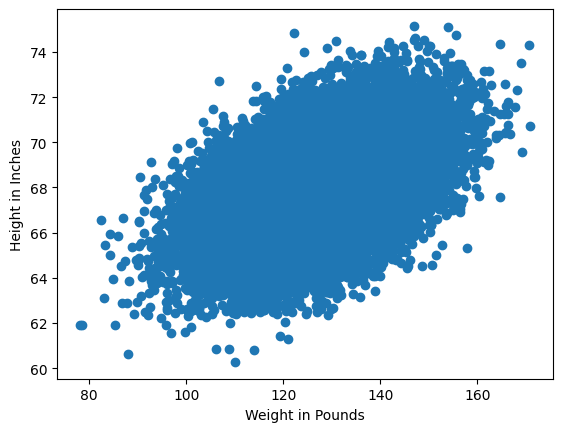

In [12]:
#Visualization of realtion ship b/w two features here
#for correlation and for performance metrix:
#scatter plot
plt.scatter(df['Weight(Pounds)'], df['Height(Inches)'])
plt.xlabel('Weight in Pounds')
plt.ylabel('Height in Inches')

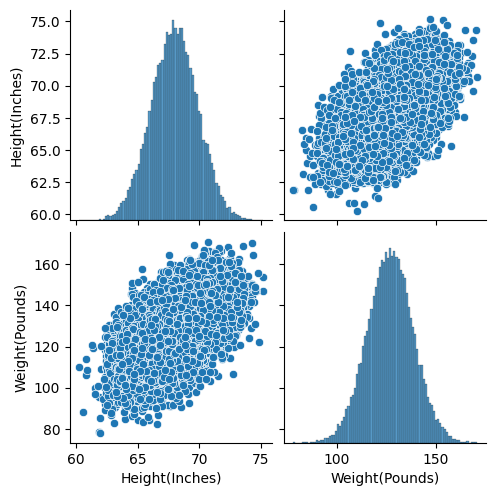

In [13]:
sns.pairplot(df)

In [14]:
X_series = df['Weight(Pounds)'] #no importance to column
np.array(X_series).shape

(25000,)

In [15]:
type(X_series)

pandas.core.series.Series

In [16]:
#height weight are not highly correlated-but let's continue linear correlation.
#Dividing features:
#Independent and Dependent Features
#X = df['Weight'] Series - but independent features should be in the form of dataframe or 2-D array.
X = df[['Weight(Pounds)']]
np.array(X).shape #in multi linear this columns increases.

(25000, 1)

In [17]:
type(X)

pandas.core.frame.DataFrame

In [18]:
X_series.head()

,Weight(Pounds)
0,112.9925
1,136.4873
2,153.0269
3,142.3354
4,144.2971


In [19]:
X.head()

,Weight(Pounds)
0,112.9925
1,136.4873
2,153.0269
3,142.3354
4,144.2971


In [20]:
#dependent feature- dont have to worry to much about dimension.
#as it has only one value- can be series as well
y = df['Height(Inches)']

In [21]:
type(y)

pandas.core.series.Series

In [22]:
y.head()

,Height(Inches)
0,65.78331
1,71.51521
2,69.39874
3,68.21660
4,67.78781


In [23]:
y #can be series or 1-D

,Height(Inches)
0,65.78331
1,71.51521
2,69.39874
3,68.21660
4,67.78781
...,...
24995,69.50215
24996,64.54826
24997,64.69855
24998,67.52918


In [24]:
np.array(y).shape

(25000,)

In [25]:
#Training Testing Data Split:
#training data - used for training purpose.
#test data - used for testing predictions
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [26]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)-This gives random split of 25% test and 75% train.
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)-all have same data selected.


In [27]:
X_train.shape #2 Dimension

(18750, 1)

In [28]:
y_train.shape

(18750,)

In [29]:
X_test.shape

(6250, 1)

In [30]:
y_test.shape

(6250,)

In [31]:
#Standardization: X(kg) y(cm) in linear reg we use gradient descent So if we have big value it takes time to reach global minima.
#This is not suitable solution:
#So to reach global moinima it takes time- So optimization takes time.

#Good approach - Take each  Independent feature and apply formula of Z-score:
#Z-score convert all values with mean = 0 and S.D = 1.
#Z-score = xi-mean/s.D and then after applying this all values will be converted to mean=0 and S.D is 1




In [32]:
#sklearn algoruthm name - can see code
#sklearn standard scaler


In [33]:
from sklearn.preprocessing import StandardScaler
#need to standardize input features and not on output as gradient descent applied on independent feature


In [34]:
scaler = StandardScaler() #intialiaze

In [35]:
scaler

StandardScaler()

In [36]:
X_train = scaler.fit_transform(X_train) #Z-score is applied and changed values are returned

In [37]:
X_train

array([[ 0.08310666],
       [-0.99311816],
       [ 0.50040551],
       ...,
       [-0.52354516],
       [ 0.73759547],
       [-0.36861454]])

In [38]:
scaler

StandardScaler()

In [39]:
#Doing same for test data:
#here we apply same formula and used mean and deviation from training data. -using transform
#if fit_transform is used - mean and sd will be calcualetd above for this data as well.
#we do this bcz of data leakage(we dont want training data to know anything about test data)
#test data should be new data to model.
X_test = scaler.transform(X_test)

In [40]:
X_test

array([[ 0.62053543],
       [-1.29869704],
       [ 0.76685832],
       ...,
       [ 0.73940988],
       [-1.16790419],
       [ 0.00246396]])

In [41]:
scaler

StandardScaler()

In [42]:
#Model: Linear Regression on Standardized Data (after removing all missing values and cleaning data and splitting data)

#Simple Linear regression:
from sklearn.linear_model import LinearRegression

In [43]:
#any libraries from sklearn. Will first intialiaze the object
regression = LinearRegression() #Intialize linear regression model

#Default parameters-fit_intercept-whether to calculate the intercept for this model or not.
#if standarization is not done then normalize can be set to True.
#n_jobs - if set to -1 will use all processors in system in converging and training step.
#Positive is to make coeffiecients to be +ve. (but not mandatory)

#Return parameters- coefficeients, rank of matrix, singular values of X, intercept, names of features.


In [44]:
regression.fit(X_series, y) #it expects 2-D array as independent/input feature.


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [45]:
regression.fit(X_train, y_train)

LinearRegression()

In [46]:
regression

LinearRegression()

In [47]:
print("Coeffiecent/Slope:",regression.coef_) #This says 1 unit movement in x(height feature) leads to 0.94 movement in weight value.

print("Intercept:", regression.intercept_) #This is the point where line meets y axis.(x=0)
#1 independent feature - y=mx+c or h(x)=Q0+Q1x
#Q0 - intercept
#Q1 - coefficient
#x - data points or that feature

Coeffiecent/Slope: [0.94883892]
Intercept: 67.9938252704


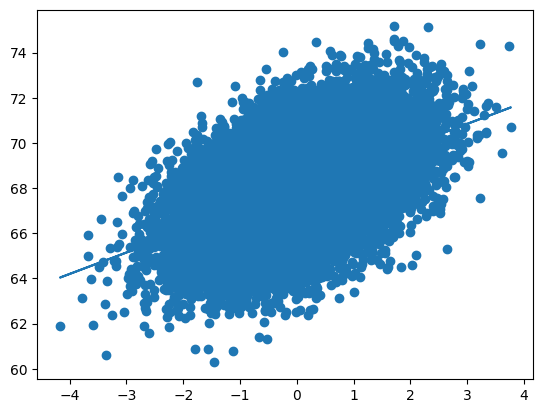

In [48]:
#Plotting best fit line:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))
#This is the best fit line created with coeffient of 0.94 and intercept of 67.993

In [49]:
#predicting test data:
y_pred=regression.predict(X_test)

In [50]:
#predicted height = intercept + coeff_(weights)
#height_pred = 67.9 + 0.9(weights)

In [51]:
y_pred

array([68.58261344, 66.76157097, 68.7214503 , ..., 68.69540615,
       66.88567232, 67.99616317])

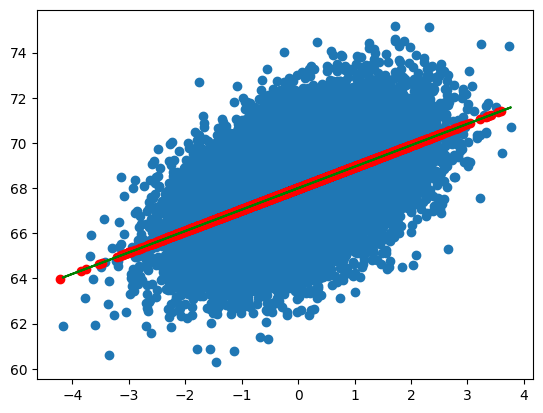

In [52]:
#Data Points:
plt.scatter(X_train, y_train)
#Best Fit line
plt.plot(X_train, regression.predict(X_train), color='green')
plt.scatter(X_test, y_pred, color="red")

In [53]:
print("Error:", y_pred-y_test)

Error: 6868     0.158143
24016   -1.135059
9668     1.062230
13640   -1.075385
14018   -3.210589
           ...   
24717    2.430532
2578     0.365345
10121   -0.550814
21601    2.307472
3474     4.444673
Name: Height(Inches), Length: 6250, dtype: float64


In [54]:
#Cost Functions:

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 2.7333807993730996
Mean Absolute Error: 1.3166150322297803
Root Mean Squared Error: 1.6532939240719116


In [56]:
#performance metrics - to check result
#R squared
#Adjusted R squared

#### R squared:
**R^2 = 1-SSR/SST**

R^2 = coeffiecient of determination.

SSR = sum of squares of residuals

SST = Sum of total squares

In [57]:
from sklearn.metrics import r2_score

In [58]:
score = r2_score(y_test, y_pred)
print(score)

0.2592643941428425


#### Adjusted R Squared

**Adj R^2 = 1-[(1-R2)*(n-1)/(n-k-1)]**

where,
R2 - R squared
n - no.of observations
k - no. of predictor variables

In [59]:
adjusted_score = 1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)


In [60]:
adjusted_score #no diff as only one feature

0.25914583850810224

In [66]:
X_train[:, 0] #this gives the series version instead of 2 d data frame

array([ 0.08310666, -0.99311816,  0.50040551, ..., -0.52354516,
        0.73759547, -0.36861454])

In [67]:
X_train.shape

(18750, 1)

In [72]:
#prediction for new data:
regression.predict(scaler.transform([[100]])) #provide in 2-d
#this is happening bcz we missed  standardization.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([65.78519279])